In [779]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from lightgbm import LGBMClassifier
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()

In [780]:
#
df1 = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [781]:
#

test_file =  pd.read_csv("test.csv")

In [782]:
#
df1 = df1.replace(to_replace ="Nov-20", value = "11-20")
df1.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50


In [783]:
#
df1.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [784]:
#
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df1['Stay'] = le.fit_transform(df1['Stay'])
train_y =df1.Stay 


# Missing values in test data

In [785]:
#
df1.fillna(0,inplace=True)
test.fillna(0,inplace=True)

# Dropping Unwanted Columns

In [786]:
#
df1 = df1.drop('patientid', axis = 1)
test = test.drop('patientid', axis = 1)

In [787]:
#
df1 = df1.drop(['case_id'], axis = 1)
test = test.drop(['case_id'], axis = 1)

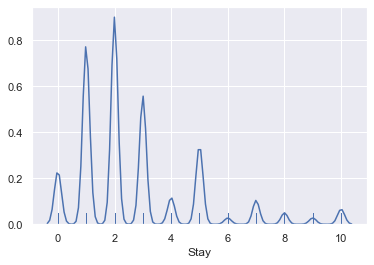

In [561]:
sns.distplot(train_y['Stay'], hist=False, rug=True)

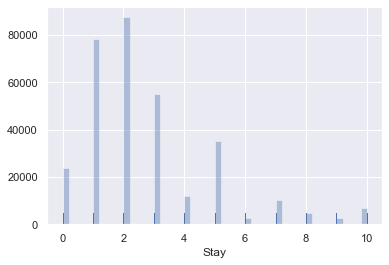

In [562]:
sns.distplot(train_y['Stay'], kde=False, rug=True);

The about distplot shows the imbalance of data and the data shows left skewness


Class imbalance can lead to a model over-predicting the class that occurs the most often, as simply predicting this class for most of the data instances, regardless of their features, will lead to the highest overall accuracy score.


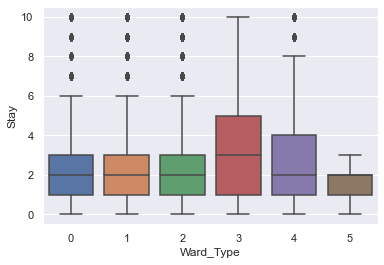

In [563]:
ax = sns.boxplot(x=train_x['Ward_Type'], y=train_y['Stay'])

## Outlier Detection


###  Z-score 
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [564]:
## https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(train_x))
#print(z)

In [565]:
#threshold = 3
#print(np.where(z > 3))

The first array contains the list of row numbers and second array respective column numbers

In [566]:
#print(z[10][0])

In [567]:
#Q1 = train_x.quantile(0.25)
#Q3 = train_x.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [568]:
#print(train_x < (Q1 - 1.5 * IQR)) |(train_x > (Q3 + 1.5 * IQR))

###  Working with Outliers: Correcting, Removing

In [569]:
# remove or filter the outliers and get the clean data using Z=score
#train_x = train_x[(z < 3).all(axis=1)]

Use previously calculated IQR score to filter out the outliers by keeping only valid values

In [570]:
#train_x = train_x[~((train_x < (Q1 - 1.5 * IQR)) |(train_x > (Q3 + 1.5 * IQR))).any(axis=1)]
#train_x.shape

In [55]:
#ns.boxplot(x=train_x["Severity of Illness"], y=train_y["Stay"])

# Model

In [788]:
df1.dtypes

Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                   int32
dtype: object

In [789]:
cols = ['Hospital_type_code','City_Code_Hospital',
       'Hospital_region_code'
       ,'Department'
       ,'Ward_Type',
       'Ward_Facility_Code',
       'Bed Grade','Type of Admission','Severity of Illness','Age']

In [790]:
from sklearn.preprocessing import LabelEncoder

for i in cols:
    le = LabelEncoder()
    df1[i] = le.fit_transform(train_x[i].astype('str'))
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i].astype('str'))


In [791]:
df1 = df1.drop(['Stay'], axis =1)

## Random Forest

In [792]:
X_train = df1
y_train = train_y

In [793]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [794]:
X_data, x_test_data, y_data, y_test_data = train_test_split(X_train, y_train, test_size = 0.3)

In [795]:
rf_para = [{'class_weight':['balanced'], 'n_estimators':[50, 100], 'max_depth':[5, 10, 15], 'max_features':[0.1, 0.3],\
            'min_samples_leaf':[1,3], 'bootstrap':[True, False]}]

In [796]:
rfc = GridSearchCV(RandomForestClassifier(), param_grid = rf_para, cv = 5, n_jobs = -1)
rfc.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'class_weight': ['balanced'],
                          'max_depth': [5, 10, 15], 'max_features': [0.1, 0.3],
                          'min_samples_leaf': [1, 3],
                          'n_estimators': [50, 100]}])

In [797]:
rfc.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [806]:
RFC = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=5, max_features=0.3, bootstrap='True', min_samples_leaf=3,\
                             n_jobs=-1)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap='True', class_weight='balanced', max_depth=5,
                       max_features=0.3, min_samples_leaf=3, n_estimators=50,
                       n_jobs=-1)

In [807]:
from sklearn.metrics import classification_report
Y_val_pred = RFC.predict(x_test_data)
target = ['class1', 'class2','class3','class4','class5','class6','class7','class8', 'class9', 'class10','class11' ]
print (classification_report(y_test_data, Y_val_pred, target_names=target))

              precision    recall  f1-score   support

      class1       1.00      1.00      1.00      7148
      class2       1.00      0.98      0.99     23389
      class3       0.98      0.97      0.98     26293
      class4       1.00      0.79      0.88     16483
      class5       0.57      0.85      0.68      3509
      class6       0.74      0.81      0.77     10549
      class7       0.86      0.76      0.81       804
      class8       0.99      0.97      0.98      3173
      class9       1.00      1.00      1.00      1445
     class10       0.62      0.90      0.73       826
     class11       0.54      0.90      0.67      1913

    accuracy                           0.92     95532
   macro avg       0.85      0.90      0.86     95532
weighted avg       0.94      0.92      0.92     95532



In [70]:
test

,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Age_lowerbound,Age_upperbound
0,3,3,3,1,77794,6,2.0,2.0,0.0,2.0,2,0,0,1,71,80
1,1,4,2,1,77794,1,2.0,2.0,1.0,2.0,4,1,0,0,71,80
2,2,2,3,1,106165,3,4.0,2.0,0.0,2.0,3,0,1,0,71,80
3,1,6,3,1,106165,1,2.0,2.0,1.0,2.0,3,1,0,0,71,80
4,2,11,2,1,127947,1,2.0,2.0,1.0,2.0,4,1,0,0,71,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,2,2,4,2,106165,3,3.0,3.0,0.0,1.0,4,0,1,0,41,50
137053,4,1,2,3,127947,2,4.0,7.0,0.0,2.0,2,1,0,0,0,10
137054,3,3,2,2,127947,6,4.0,12.0,2.0,1.0,2,0,0,1,0,10
137055,1,1,2,2,127947,2,4.0,10.0,1.0,1.0,2,1,0,0,41,50


In [808]:
Y_pred = RFC.predict(test)

In [809]:
test_submission = pd.read_csv("test.csv")

In [812]:
solution = pd.DataFrame({'case_id':test_submission.case_id, 'Stay':Y_pred}, columns = ['case_id','Stay'])


In [813]:
solution

,case_id,Stay
0,318439,9
1,318440,9
2,318441,2
3,318442,2
4,318443,9
...,...,...
137052,455491,2
137053,455492,2
137054,455493,2
137055,455494,2


In [814]:
solution['Stay']=solution['Stay'].map({0:'0-10',1:'11-20',2:'21-30',
                             3:'31-40',4:'41-50',5:'51-60',6:'61-70',7:'71-80',8:'81-90',9:'91-100',10:'More than 100 days'})

In [815]:
solution.to_csv('RFCStay_sol3.csv', index=False)

### Learning Curve

In [79]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(model,title, X, y,n_jobs = 1, ylim = None, cv = None,train_sizes = np.linspace(0.1, 1, 5)):
    
    # Figrue parameters
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_score, test_score = learning_curve(model, X, y, cv = cv, n_jobs=n_jobs, train_sizes=train_sizes)
    # Calculate mean and std
    train_score_mean = np.mean(train_score, axis=1)
    train_score_std = np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_std = np.std(test_score, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std,\
                      alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std,\
                    alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_score_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc = "best")
    return plt

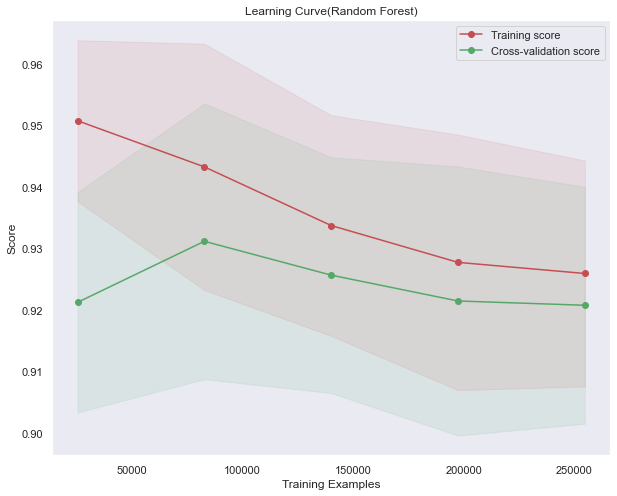

In [80]:
# Plotting Learning Curve
title = 'Learning Curve(Random Forest)'
model = RFC
cv = ShuffleSplit(n_splits=50, test_size=0.2,random_state=0)
plot_learning_curve(model,title,X_train, y_train, n_jobs=-1,ylim=None,cv=cv)
plt.show()

## LGBMClassifier

In [762]:
# Tuned the Hyperparameters of LighGBM Classifier :
lgb_model = LGBMClassifier()

In [764]:
# Mention Categorical Values of the Light GBM Model to Handle :
categorical_features = cols

# Apply Stratified K-Fold Cross Validation where K=5 or n_splits=5 :
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []

# Pass predictor_train,target_train for Cross Validation :
for fold,(t_id,v_id) in enumerate(kf.split(df1,train_y)):
    
    # Split train and validation data :
    tx = df1.iloc[t_id]; ty = train_y.iloc[t_id]
    vx = df1.iloc[v_id]; vy = train_y.iloc[v_id]
    print(1)
    # Train/Fit the Data to LighGBM Model :
    lgb_model.fit(tx,ty, categorical_feature = categorical_features )
    
    # Predict the Validation Data to Train LighGBM Model :
    val_y = lgb_model.predict(vx)
    print(1)
    # Get Accuracy Score on Validation Data for Each Fold :
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

# Get Mean of Accuracy Score on Validation Data for All 5 Folds :
print(f"Mean accuracy score {np.mean(acc)}")

1
1
fold 0 accuracy 1.0
1
1
fold 1 accuracy 1.0
1
1
fold 2 accuracy 1.0
1
1
fold 3 accuracy 1.0
1
1
fold 4 accuracy 1.0
Mean accuracy score 1.0


In [765]:
def model_train_predict_submit( lgbClassifier,X_train, y_train, X_test):
    
    categorical_features = cols
    lgbClassifier.fit( X_train, y_train , categorical_feature = categorical_features )
    y_predictions = lgbClassifier.predict( X_test )
     
   
    solution_1 = pd.DataFrame({'case_id': test_file['case_id'], 'Stay' : y_predictions})
    solution_1['Stay'] = solution_1['Stay'].astype(int)
    solution_1[ 'Stay' ]=solution_1[ 'Stay' ].map({0:'0-10',
                                                              1:'11-20',2:'21-30',
                                                              3:'31-40',4:'41-50',
                                                              5:'51-60',6:'61-70',7:'71-80',8:'81-90',
                                                              9:'91-100',10:'More than 100 Days'})
   
    solution_1.to_csv("LGBMsubmission2.csv",index=False)
    return solution_1


model_classifier = lgb_model
sub = model_train_predict_submit( model_classifier,df1,train_y, test)

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64